In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import util
import trackpy as tp
import functions_analyze as lib
import imageio
import os


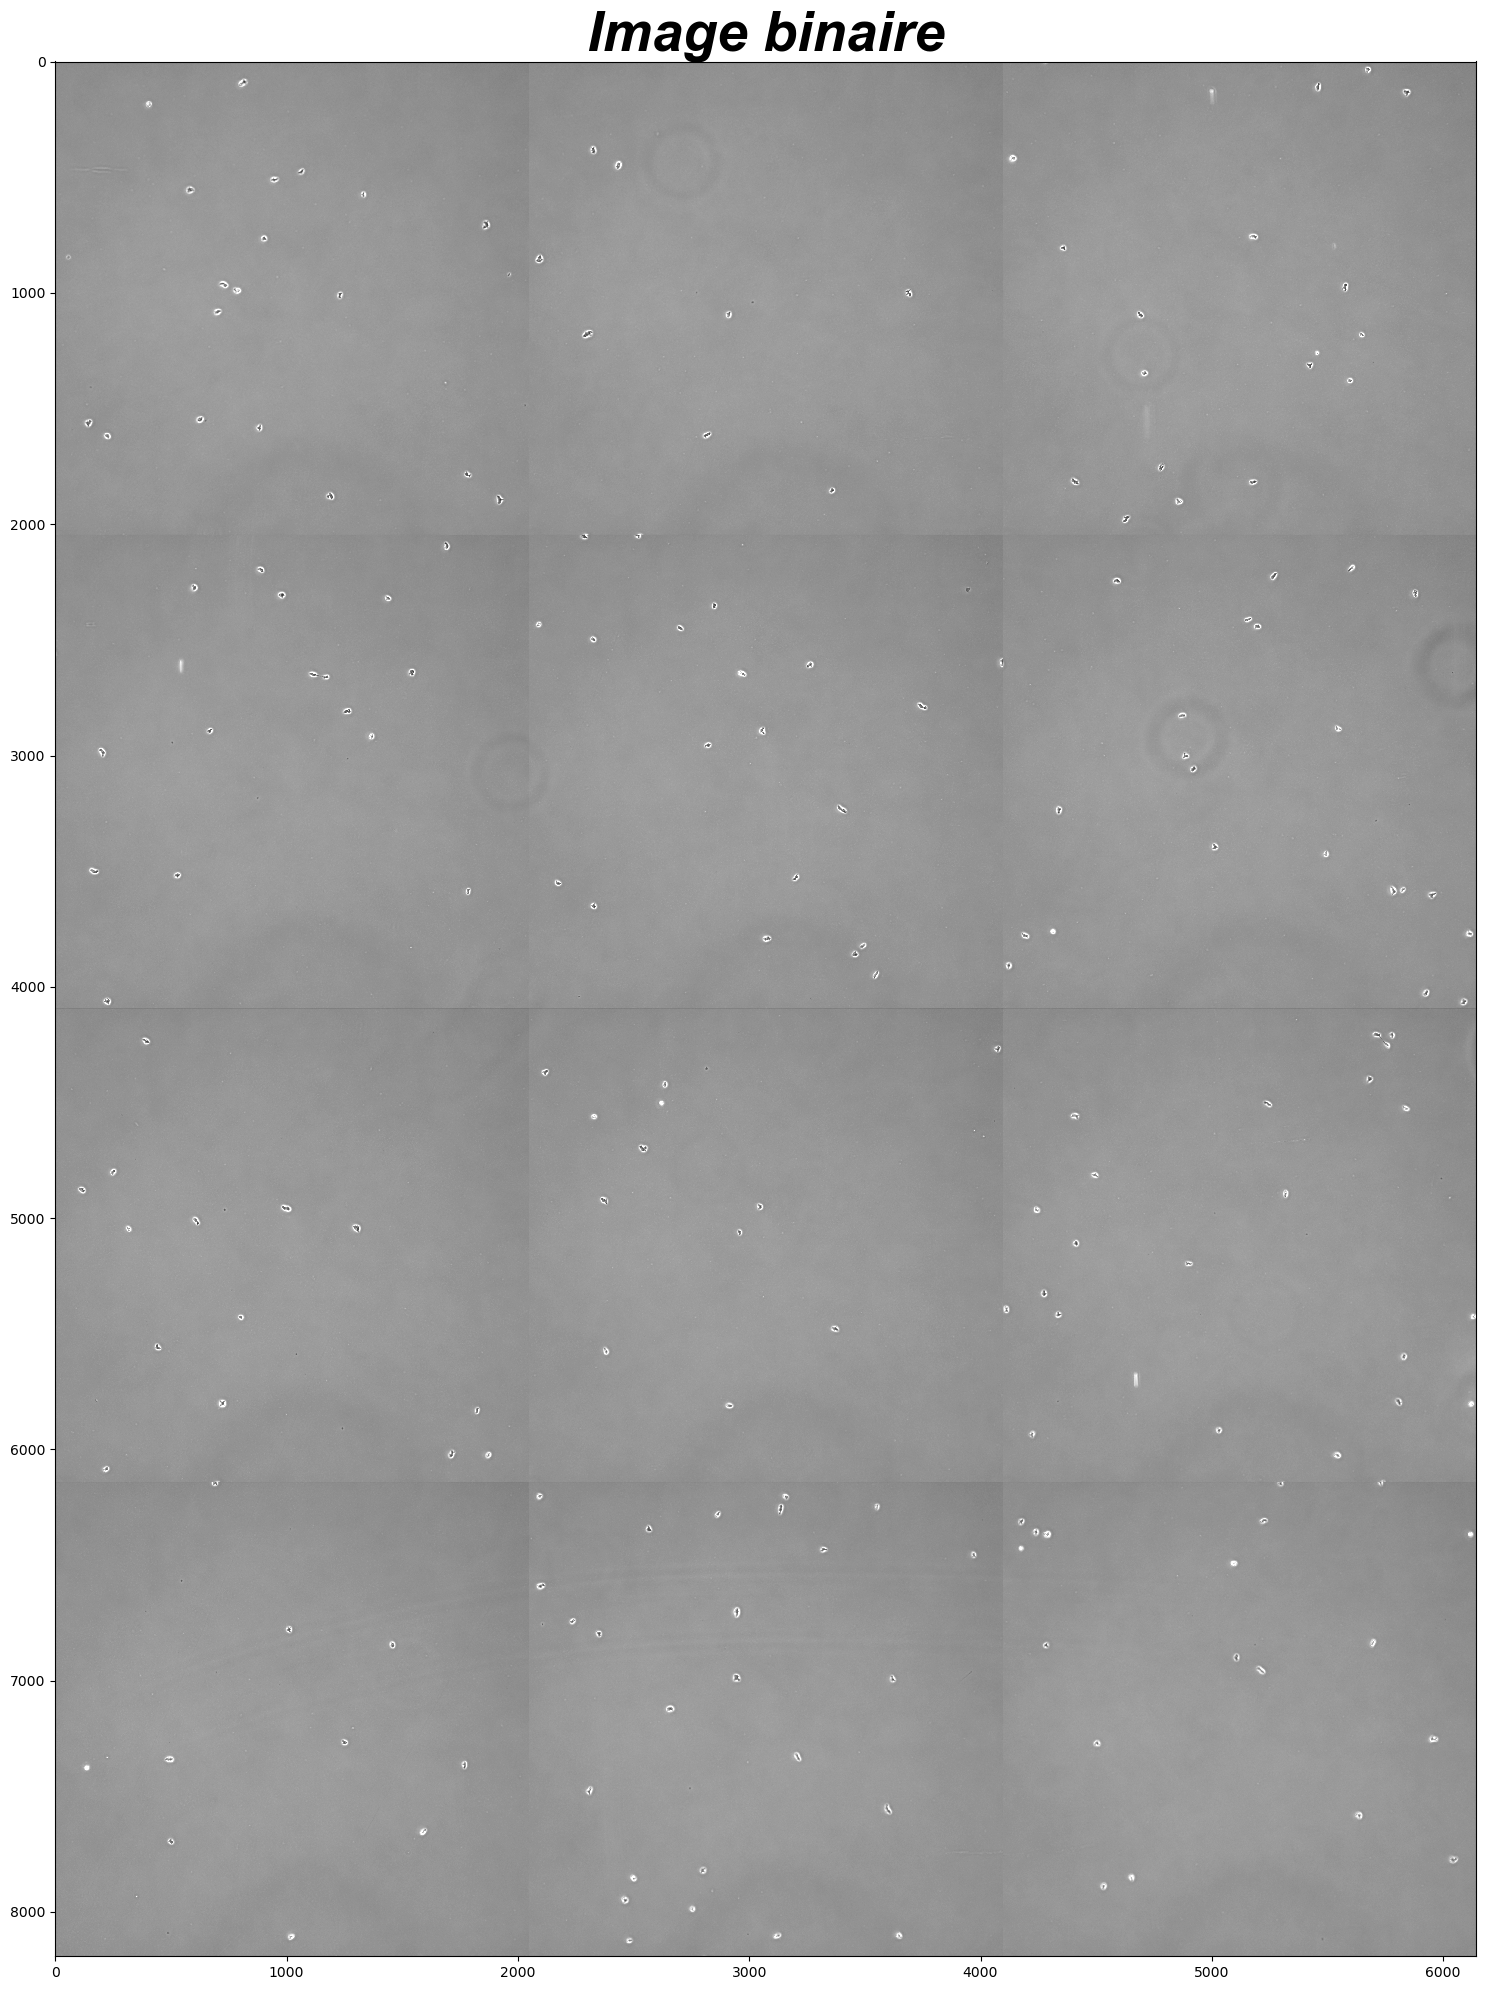

In [2]:
frame = lib.import_img_sequences(path='/Users/souchaud/Desktop/A_analyser/CytoOne_HL5_10x/2024_03_05_ASMOT132_AX3_MAT_P3_10x_CytoOne_HL5_0403-15h-0503-14h07/mosaic/',
                                 first_frame=0, last_frame=340, file_extension='.tif')

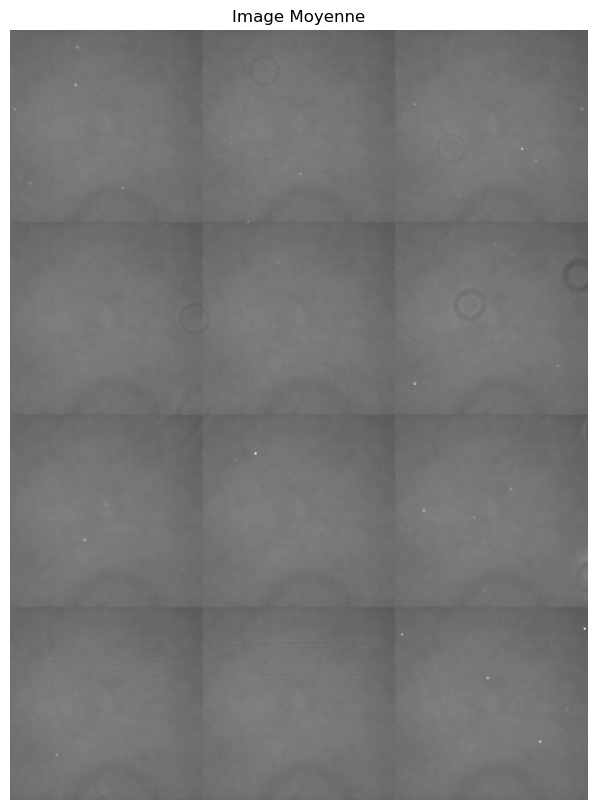

In [3]:
# Conversion des images en tableau NumPy
# Assurez-vous que toutes vos images ont les mêmes dimensions
images_array = np.stack([np.array(img) for img in frame])

# Calculer la médiane pixel par pixel
median_image = np.median(images_array, axis=0)

# Afficher l'image médiane
plt.figure(figsize=(10, 10))
plt.imshow(median_image, cmap='gray')  # Utilisez cmap='gray' pour les images en niveaux de gris
plt.title("Image Moyenne")
plt.axis('off')  # Cacher les axes
plt.show()

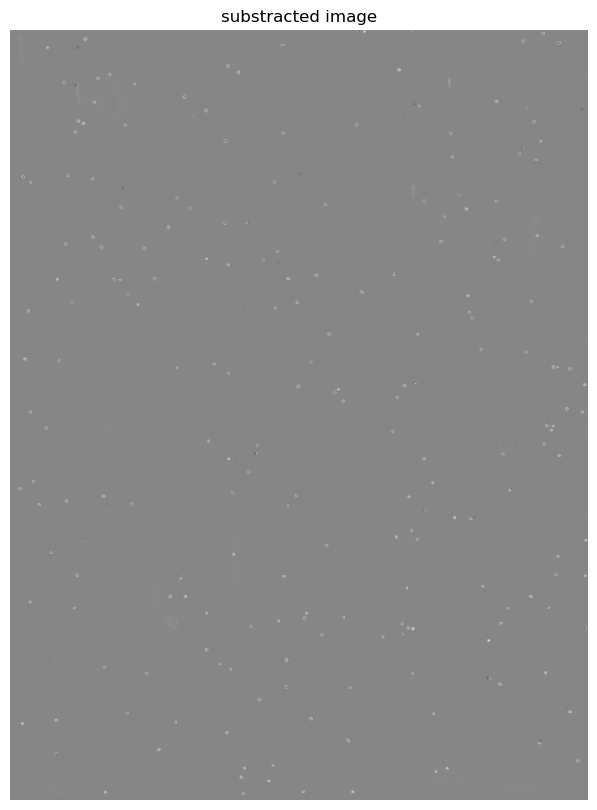

In [4]:
# Soustraire l'image médiane
subtracted_image = frame[1] - median_image
# Afficher l'image médiane
plt.figure(figsize=(10, 10))
plt.imshow(subtracted_image, cmap='gray')  # Utilisez cmap='gray' pour les images en niveaux de gris
plt.title("substracted image")
plt.axis('off')  # Cacher les axes
plt.show()

In [5]:
# # Assurez-vous d'avoir le bon chemin de sauvegarde
# save_path = '/Users/souchaud/Desktop/A_analyser/CytoOne_HL5_10x/2024_03_05_ASMOT132_AX3_MAT_P3_10x_CytoOne_HL5_0403-15h-0503-14h07/mosaic_substract/'

# # Vérifier si le dossier existe
# if not os.path.exists(save_path):
#     # Le dossier n'existe pas, donc on le crée
#     os.makedirs(save_path)
#     print(f"Le dossier {save_path} a été créé.")
# else:
#     print(f"Le dossier {save_path} existe déjà.")

    
# for i, img in enumerate(frame):
#     # Convertir l'image en tableau NumPy si ce n'est pas déjà le cas
#     img_array = np.array(img)
    
#     # Soustraire l'image médiane
#     subtracted_image = img_array - median_image

#     filename = f'mosaic_total_{i}.tif'
    
#     # Sauvegarder l'image
#     imageio.imwrite(os.path.join(save_path, filename), subtracted_image.astype(np.uint32))


In [6]:
# Chemin où sauvegarder les images soustraites
save_path = '/Users/souchaud/Desktop/A_analyser/CytoOne_HL5_10x/2024_03_05_ASMOT132_AX3_MAT_P3_10x_CytoOne_HL5_0403-15h-0503-14h07/mosaic_substract/'

# Vérifiez si le dossier existe. Sinon, créez-le.
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"Le dossier {save_path} a été créé.")
else:
    print(f"Le dossier {save_path} existe déjà.")

# Supposons que 'frame' est une liste ou un itérable des images que vous voulez traiter
# et que 'median_image' est l'image médiane calculée précédemment

for i, img in enumerate(frame):
    # Convertir l'image en tableau NumPy si ce n'est pas déjà le cas
    img_array = np.array(img)
    
    # Soustraire l'image médiane de chaque image
    subtracted_image = img_array - median_image

    # Ajuster les valeurs négatives et NaN
    subtracted_image[subtracted_image < 0] = 0  # Remplacer les valeurs négatives par 0
    subtracted_image = np.nan_to_num(subtracted_image, nan=0, posinf=0, neginf=0)  # Remplacer NaN et inf par 0

    # Construire le nom de fichier pour chaque image soustraite
    filename = f'mosaic_total_{i}.tif'
    
    # Sauvegarder l'image ajustée
    # Note : Assurez-vous que la conversion en uint32 n'introduit pas de distorsions
    imageio.imwrite(os.path.join(save_path, filename), subtracted_image.astype(np.uint8))


Le dossier /Users/souchaud/Desktop/A_analyser/CytoOne_HL5_10x/2024_03_05_ASMOT132_AX3_MAT_P3_10x_CytoOne_HL5_0403-15h-0503-14h07/mosaic_substract/ a été créé.
